# 06 Classification dengan KNN (K-Nearest Neighbors)

- KNN adalah model machine learning yang dapat digunakan untuk melakukan prediksi berdasarkan kedekatan karakteristik dengan sejumlah tetangga terdekat (neighbors).
- Prediksi yang dilakukan dapat diterapkan baik pada classification maupun regression task.

# Sample Dataset

In [29]:
import pandas as pd

sensus = {
    'tinggi': [158, 170, 183, 191, 155, 163, 180, 158, 178],
    'berat': [64, 86, 84, 80, 49, 59, 67, 54, 67],
    'jk': ['pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita', 'wanita']
}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita


# Visualisasi Data

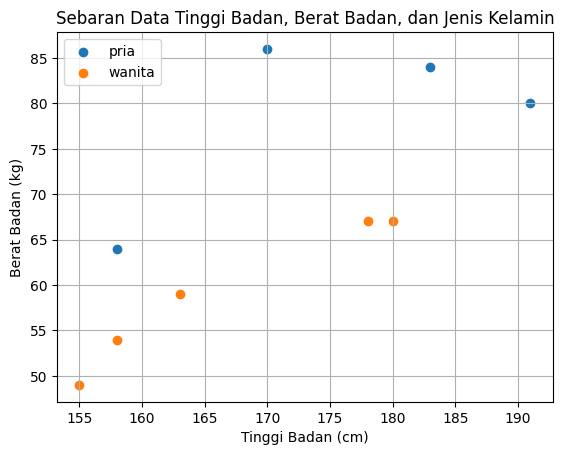

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()


# Classification dengan KNN

## Preprocessing Data

In [31]:
import numpy as np

X_train = np.array(sensus_df[['tinggi', 'berat']])
y_train = np.array(sensus_df['jk'])

print(f'X_train: \n{X_train}\n')
print(f'y_train: {y_train}')

X_train: 
[[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]

y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


In [32]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)

print(f'y_train: \n{y_train}')

y_train: 
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [33]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [0 0 0 0 1 1 1 1 1]


## Training KNN Classification Model

In [34]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## Prediksi Jenis Kelamin

In [35]:
tinggi_badan = 155
berat_badan = 70

X_new = np.array([tinggi_badan, berat_badan]).reshape(1, -1)
X_new

array([[155,  70]])

In [36]:
y_new = model.predict(X_new)
y_new

array([1])

In [37]:
lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

## Visualisasi Nearest Neighbors

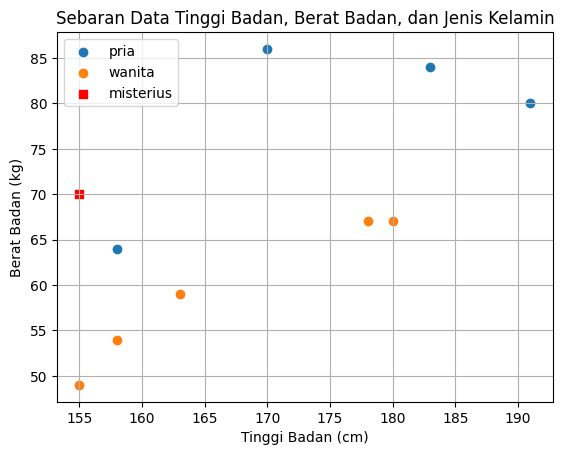

In [38]:
fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

ax.scatter(tinggi_badan, 
           berat_badan, 
           marker='s', 
           color='red',
           label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

## Kalkulasi Distance (Euclidean Distance)

References: [Euclidean Distance](https://en.wikipedia.org/wiki/Euclidean_distance)

In [39]:
misterius = np.array([tinggi_badan, berat_badan])
misterius

array([155,  70])

In [40]:
X_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [178,  67]])

In [41]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak

[np.float64(6.708203932499369),
 np.float64(21.93171219946131),
 np.float64(31.304951684997057),
 np.float64(37.36308338453881),
 np.float64(21.0),
 np.float64(13.601470508735444),
 np.float64(25.179356624028344),
 np.float64(16.278820596099706),
 np.float64(23.194827009486403)]

In [42]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,jk,jarak
0,158,64,pria,6.708204
5,163,59,wanita,13.601471
7,158,54,wanita,16.278821
4,155,49,wanita,21.000000
1,170,86,pria,21.931712
8,178,67,wanita,23.194827
6,180,67,wanita,25.179357
2,183,84,pria,31.304952
3,191,80,pria,37.363083


## Evaluasi KNN Classification Model

### Testing Set

In [43]:
X_test = np.array([[168, 65], [180, 96], [160, 52], [169, 67]])
y_test = lb.transform(np.array(['pria', 'pria', 'wanita', 'wanita'])).flatten()

print(f'X_test: \n{X_test}\n')
print(f'y_test: \n{y_test}')

X_test: 
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test: 
[0 0 1 1]


### Prediksi terhadap Testing Set

In [44]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1])

### Acuracy Score

Acuracy score mengukur seberapa banyak prediksi yang benar dibandingkan dengan total prediksi yang dilakukan.

In [45]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(f'Akurasi: {acc}')

Akurasi: 0.75


### Precision

Precision mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan total prediksi positif yang dilakukan.

In [46]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)
print(f'Precision: {prec}')

Precision: 0.6666666666666666


### Recall

Recall mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan total data positif yang ada.

In [47]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)
print(f'Recall: {rec}')

Recall: 1.0


### F1 Score

F1 Score adalah rata-rata harmonis dari precision dan recall, memberikan gambaran yang lebih baik tentang keseimbangan antara keduanya.

In [48]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

F1 Score: 0.8


### Classification Report

In [49]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=lb.classes_)
print(report)

              precision    recall  f1-score   support

        pria       1.00      0.50      0.67         2
      wanita       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



### Matthews Correlation Coefficient (MCC)

Matthews Correlation Coefficient (MCC) adalah metrik yang mengukur kualitas klasifikasi biner, memberikan nilai antara -1 dan 1, di mana 1 berarti prediksi sempurna, 0 berarti prediksi acak, dan -1 berarti prediksi terbalik.

In [50]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)
print(f'MCC: {mcc}')

MCC: 0.5773502691896258
